# CAR PRICE PREDICTION

In [1080]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [1081]:
#importing the dataset now
data = pd.read_csv("cardata.csv")

In [1082]:
#lets check some random records in data
data.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
231,verna,2017,9.25,9.40,15001,Petrol,Dealer,Manual,0
174,Honda CB Unicorn,2015,0.38,0.72,38600,Petrol,Individual,Manual,0
232,elantra,2015,11.45,14.79,12900,Petrol,Dealer,Automatic,0
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
24,wagon r,2013,2.90,4.41,56879,Petrol,Dealer,Manual,0
49,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0
147,Yamaha FZ S V 2.0,2015,0.55,0.84,58000,Petrol,Individual,Manual,0
65,etios liva,2014,4.75,6.95,45000,Diesel,Dealer,Manual,0
80,corolla altis,2016,14.73,14.89,23000,Diesel,Dealer,Manual,0
265,jazz,2017,6.50,8.70,21200,Petrol,Dealer,Manual,0


In [1083]:
#Lets check shape of data
data.shape

(301, 9)

In [1084]:
 #lets check data types of all columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [1085]:
#Lets check whether there are any missing values values or not 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [1086]:
#Lets have look at each column how many unique values they have
data.nunique()<10

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type         True
Seller_Type       True
Transmission      True
Owner             True
dtype: bool

So from above we can clearly see that Fuel_Type, Seller_type, Transmission and Owner are categorical values

In [1087]:
#Lets check what unique values all columns have
unique_values = [features for features in data.columns if data[features].nunique()<10]
for feature in unique_values:
    print(feature, data[feature].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


Lets store our numerical, categorical and temporal variables separetly

In [1088]:
#temporal features are used for storing the year type or datatime type of data
temporal_feature = [feature for feature in data.columns if 'Year' in feature]

In [1089]:
#numerical features to store numerical data features only
numerical_features =[feature for feature in data.columns if data[feature].dtypes!='O' and feature not in temporal_feature]

In [1090]:
#categorical features are used for storing categorical data
categorical_features=[feature for feature in data.columns if feature not in temporal_feature and data[feature].nunique()<20]

# DATA VISUALISATION FOR ANLYSIS AND INSIGHTS

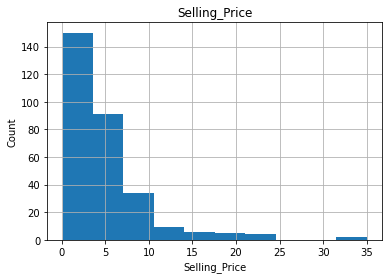

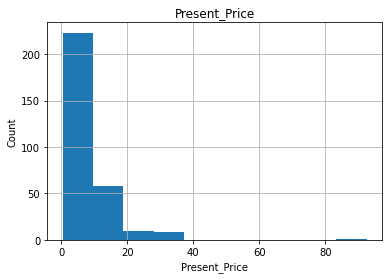

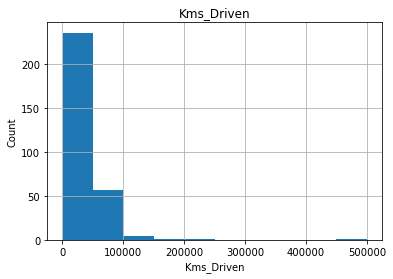

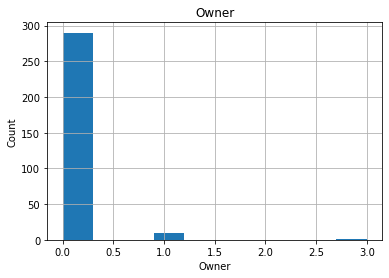

In [1091]:
for feature in numerical_features:
    data1=data.copy()
    data1[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Both Selling_Price and Present_Price are skewed so we need to have some transformation 
1. We are using logarithmic transformation to tackle the skewness of the data

(array([ 5., 17., 34., 23., 26., 40., 82., 48., 17.,  9.]),
 array([-2.30258509, -1.71679178, -1.13099846, -0.54520515,  0.04058817,
         0.62638148,  1.2121748 ,  1.79796812,  2.38376143,  2.96955475,
         3.55534806]),
 <BarContainer object of 10 artists>)

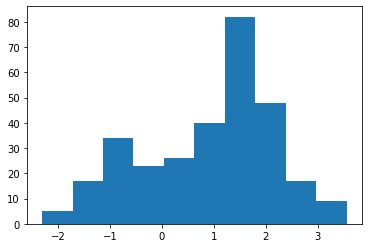

In [1092]:
plt.hist(np.log(data['Selling_Price']))

(array([20., 51., 21., 10., 26., 95., 51., 17.,  9.,  1.]),
 array([-1.13943428, -0.57266194, -0.0058896 ,  0.56088274,  1.12765509,
         1.69442743,  2.26119977,  2.82797211,  3.39474446,  3.9615168 ,
         4.52828914]),
 <BarContainer object of 10 artists>)

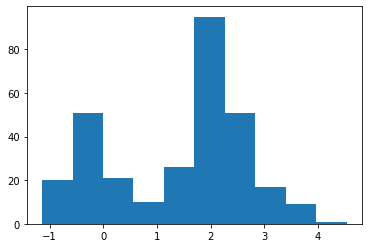

In [1093]:
plt.hist(np.log(data['Present_Price']))

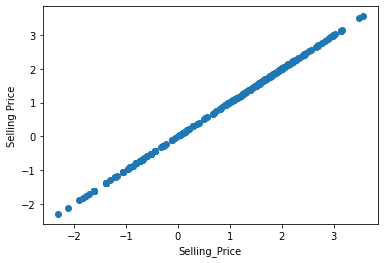

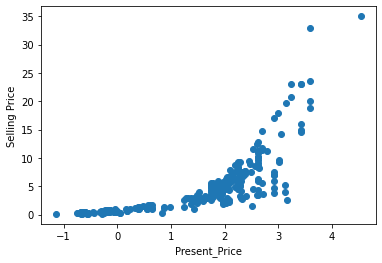

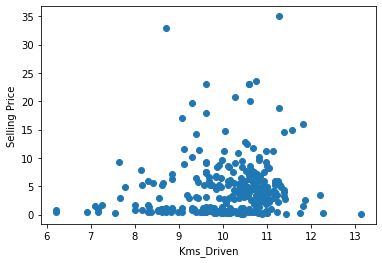

In [1094]:
#We will use logarthmic transformation
for feature in numerical_features:
    data1 = data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data1[feature])
        
        plt.scatter(data1[feature],data1['Selling_Price']) 
        plt.xlabel(feature)
        plt.ylabel('Selling Price')
        plt.show()


Here with Selling_Price v/s Present_Price we can find that it is have exponential relationship 
1. As for higher present_price, selling_price is also much higher

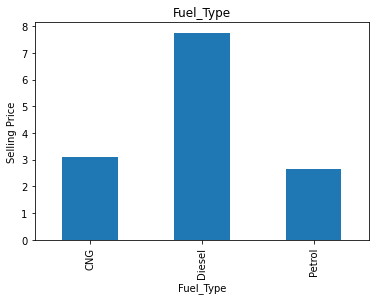

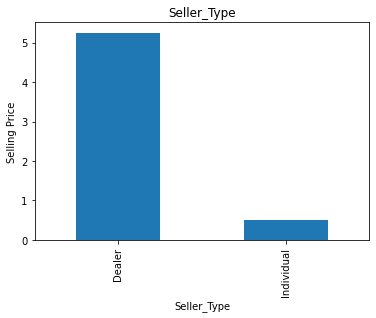

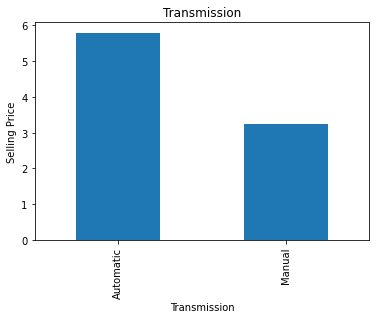

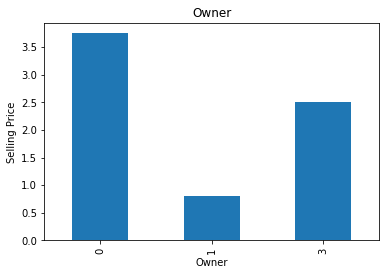

In [1095]:
#Lets visualise the categorical features with dependent variable i.e Selling_Price
for feature in categorical_features:
    data1 =data.copy()
    data1.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
    plt.title(feature)
    plt.show()

Insights
1. We can clearly see that price of diesel cars is higher as compare to other two types.
2. In 2nd chart we can see that price offered by individual is low as compare to the Dealer
3. In 3rd it also ovious that price for Automatic transmission will be higher
4. Owner type 0 are having higher selling_price as compare to others

# OUTLIERS

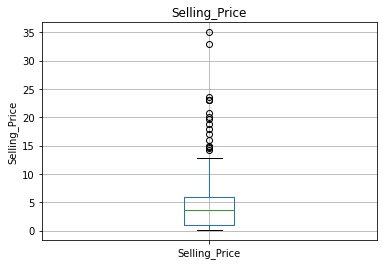

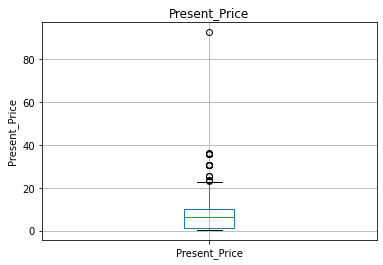

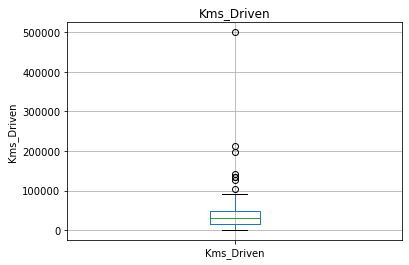

In [1096]:
for feature in numerical_features:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Here we can clearly see that there are few outliers in Selling_Price, Present_Price and Kms_driven 


# HANDLING THE OUTLIERS

In [1097]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    return upper_fence, lower_fence
               

In [1098]:
#Lets check for 'Selling_Price'
upper, lower = outliers(data, 'Selling_Price')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

data = data[(data['Selling_Price']<upper) & data['Selling_Price']>lower]
#dropping the outlier


data.drop(data[data['Selling_Price']>upper].index,inplace=True)



Upper whisker:  13.649999999999999
Lower Whisker:  -6.749999999999999


In [1099]:
#Lets check for 'Present_Price'
upper, lower = outliers(data, 'Present_Price')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

data = data[(data['Present_Price']>lower) & data['Present_Price']<upper]

data.drop(data[data['Present_Price']>upper].index, inplace=True)


Upper whisker:  21.947499999999998
Lower Whisker:  -11.5125


In [1100]:
#Lets check for 'Kms_Driven'
upper, lower = outliers(data, 'Kms_Driven')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

data = data[(data['Kms_Driven']>lower) & data['Kms_Driven']<upper]
data.drop(data[data['Kms_Driven']>upper].index, inplace=True)

Upper whisker:  94265.0
Lower Whisker:  -32559.0


# BOX PLOT AFTER HANDLING OUTLIERS

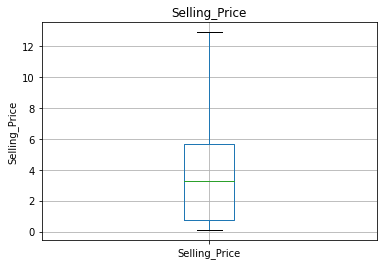

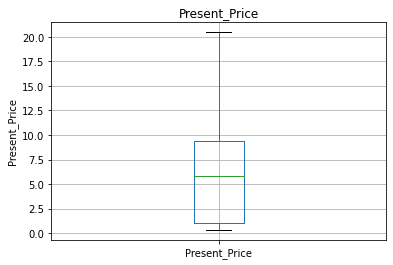

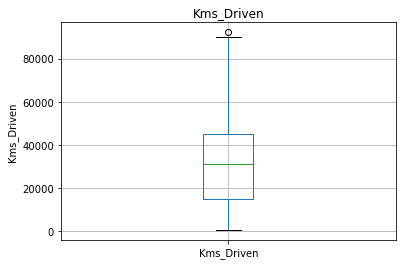

In [1101]:
#Now lets check outliers whether they got removed or not
for feature in numerical_features:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [1102]:
#lets save the above cleaned data
data.to_csv('CleanedCarData.csv', sep='\t', index=False,header=True)

# ENCODING THE CATEGORICAL FEATURES

In [1103]:
#encoding Fuel_Type colmn
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)

#encoding Seller_Type column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding Transmission column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [1104]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# TRAIN_TEST SPLIT

In [1105]:
#First separating the indepedent and depedent variables

#dependent variable
X=data.drop(['Car_Name','Selling_Price'], axis=1)
Y=data['Selling_Price']

In [1106]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [1107]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [1108]:
#Now splitting  training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state =3)
    

In [1109]:
X_train.shape

(248, 7)

In [1110]:
Y_train.shape

(248,)

In [1111]:
X_test.shape

(28, 7)

In [1112]:
Y_test.shape

(28,)

# MODEL TRAINING WITH LINEAR REGRESSION 

In [1113]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [1114]:
linear_reg_model_train = LinearRegression()

In [1115]:
#train the model
linear_reg_model_train.fit(X_train, Y_train)

LinearRegression()

In [1116]:
## MODEL EVALUATION
#prediction 
linear_reg_train_predict = linear_reg_model_train.predict(X_train)

In [1117]:
#R squared error for evaluation
linear_train_score = metrics.r2_score(Y_train,linear_reg_train_predict)

print("R squared error : ", linear_train_score)

R squared error :  0.8748300088193984


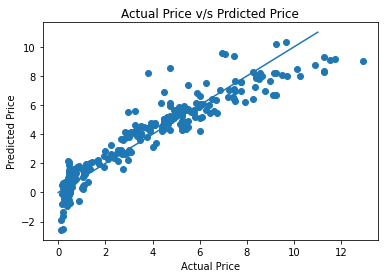

In [1118]:
#Lets visualise the actual and predicted selling price
plt.scatter(Y_train,linear_reg_train_predict)
plt.plot(range(12), range(12))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Prdicted Price")
plt.show()

In [1119]:
#On lets do same for test
linear_reg_model_test = LinearRegression()

In [1120]:
linear_reg_model_test.fit(X_test,Y_test)

LinearRegression()

In [1121]:
linear_reg_test_predict= linear_reg_model_test.predict(X_test)

In [1122]:
#R squared error for evaluation
linear_test_score = metrics.r2_score(Y_test,linear_reg_test_predict)

print("R squared error : ", linear_test_score)

R squared error :  0.8697799232046343


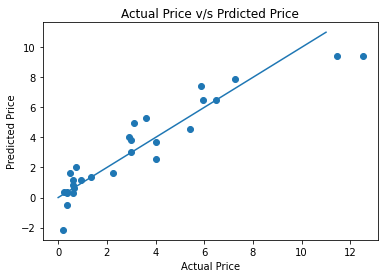

In [1123]:
#Lets visualise the actual and predicted selling price
plt.scatter(Y_test,linear_reg_test_predict)
plt.plot(range(12), range(12))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Prdicted Price")
plt.show()

# MODEL TRAINING WITH LASSO REGRESSION 

In [1124]:
from sklearn.linear_model import Lasso

In [1125]:
lasso_reg_model_train = Lasso()

In [1126]:
#train the model
lasso_reg_model_train.fit(X_train, Y_train)

Lasso()

In [1127]:
##Model Prediction
#prediction 
lasso_reg_train_predict = lasso_reg_model_train.predict(X_train)

In [1128]:
#R squared error for evaluation
lasso_train_score = metrics.r2_score(Y_train,lasso_reg_train_predict)

print("R squared error : ", lasso_train_score)

R squared error :  0.8237111963734253


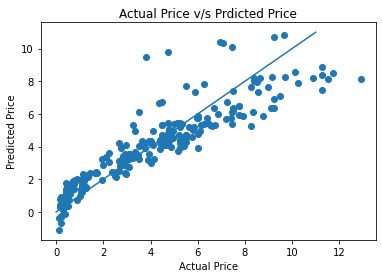

In [1129]:
#Lets visualise the actual and predicted selling price
plt.scatter(Y_train,lasso_reg_train_predict)
plt.plot(range(12), range(12))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Prdicted Price")
plt.show()

In [1130]:
#On lets do same for test
lasso_reg_model_test = Lasso()

In [1131]:
lasso_reg_model_test.fit(X_test,Y_test)

Lasso()

In [1132]:
lasso_reg_test_predict=lasso_reg_model_test.predict(X_test)

In [1133]:
#R squared error for evaluation
lasso_test_score = metrics.r2_score(Y_test,lasso_reg_test_predict)

print("R squared error : ", lasso_test_score)

R squared error :  0.7764471891246341


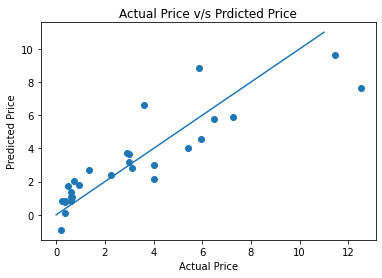

In [1134]:
#Lets visualise the actual and predicted selling price
plt.scatter(Y_test,lasso_reg_test_predict)
plt.plot(range(12), range(12))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Prdicted Price")
plt.show()

# MODEL TRAINING WITH RIDGE REGRESSION 

In [1135]:
from sklearn.linear_model import Ridge

In [1136]:
ridge_reg_model_train = Ridge()

In [1137]:
#train the model
ridge_reg_model_train.fit(X_train, Y_train)

Ridge()

In [1138]:
##Model Prediction
#prediction 
ridge_reg_train_predict = ridge_reg_model_train.predict(X_train)

In [1139]:
#R squared error for evaluation
ridge_train_score = metrics.r2_score(Y_train,ridge_reg_train_predict)

print("R squared error : ", ridge_train_score)

R squared error :  0.8747859895466268


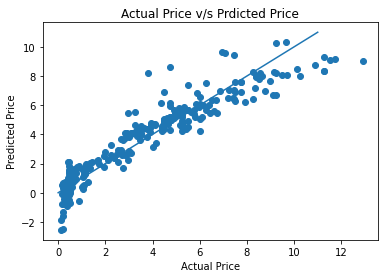

In [1140]:
#Lets visualise the actual and predicted selling price
plt.scatter(Y_train,ridge_reg_train_predict)
plt.plot(range(12), range(12))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Prdicted Price")
plt.show()

In [1141]:
#On lets do same for test
ridge_reg_model_test = Ridge()

In [1142]:
ridge_reg_model_test.fit(X_test,Y_test)

Ridge()

In [1143]:
ridge_reg_test_predict=ridge_reg_model_test.predict(X_test)

In [1144]:
#R squared error for evaluation
ridge_test_score = metrics.r2_score(Y_test,ridge_reg_test_predict)

print("R squared error : ", ridge_test_score)

R squared error :  0.8650277872778854


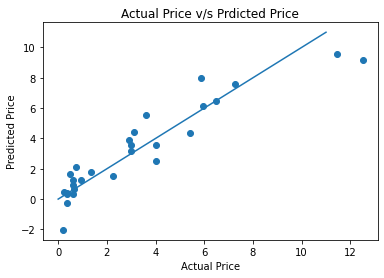

In [1145]:
#Lets visualise the actual and predicted selling price
plt.scatter(Y_test,ridge_reg_test_predict)
plt.plot(range(12), range(12))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Prdicted Price")
plt.show()

All three models are showing sort of similar pattern but Ridge Regression model is showing better 
R squared value for both train and test data
